In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from google.colab import drive


# Mount Google Drive
#drive.mount('/content/drive', force_remount=True)

#train_data = pd.read_csv("/content/drive/MyDrive/EE599/train.csv")
#test_data = pd.read_csv("/content/drive/MyDrive/EE599/test.csv")

# take the daa from the csv file
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")



In [52]:
# Display the first few rows of each dataset to get an initial look
print("Train Data Preview:")
print(train_data.head())
print("\nTest Data Preview:")
print(test_data.head())

# Check the shape of the datasets
print("\nTrain Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Info about the dataset to understand data types and non-null counts
print("\nTrain Data Info:")
print(train_data.info())

# Checking for any missing values in the dataset
print("\nMissing values in train data:")
print(train_data.isnull().sum().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum().sum())

# Summary statistics for numeric features in the train dataset
print("\nTrain Data Summary Statistics:")
print(train_data.describe())


Train Data Preview:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-


Class Distribution in Training Data:
Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


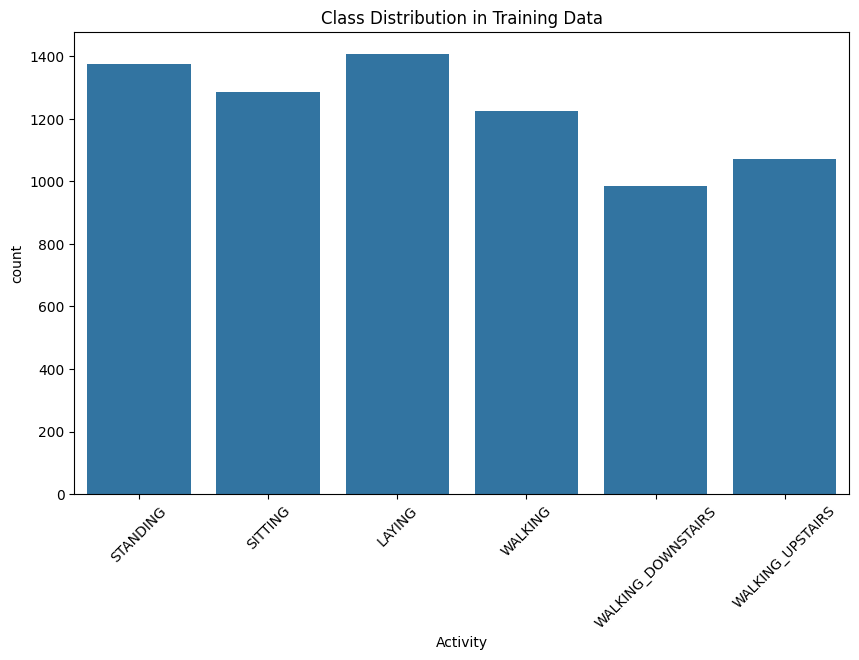

In [53]:
# Check class distribution in training data
print("\nClass Distribution in Training Data:")
print(train_data['Activity'].value_counts())

# Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Activity')
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=45)
plt.show()


Data is well balanced

Since the data is clean, balanced  with no missing values, let's contaminate it:
We'll be adding:
1. Missing values
2. Add outliers
3. Inconsistent scales
4. Introduce class imbalance
5. Label Noise

Adding Missing Values

In [54]:
import numpy as np
import pandas as pd

# Checking for any missing values in the dataset
print("\nInitial Missing values in train data:", train_data.isnull().sum().sum())
print("\nInitial Missing values in test data:", test_data.isnull().sum().sum())

# Set parameters for contamination
num_rows_to_contaminate = int(train_data.shape[0] * 0.30)  # 30% of rows
num_features_to_contaminate = int((train_data.shape[1] - 1) * 0.2)  # 20% of features (excluding 'Activity')

# Exclude the 'Activity' column for contamination
feature_columns = train_data.columns.difference(['Activity'])

# Randomly select row indices to contaminate
row_indices = np.random.choice(train_data.index, num_rows_to_contaminate, replace=False)

for row in row_indices:
    # Randomly select feature indices for each selected row, excluding 'Activity'
    feature_indices = np.random.choice(feature_columns, num_features_to_contaminate, replace=False)
    train_data.loc[row, feature_indices] = np.nan

# Checking missing values in the dataset after contamination
rows_with_missing_values = train_data.isnull().any(axis=1).sum()
print("Number of rows with missing values:", rows_with_missing_values)
print("\nTotal missing values in train data:", train_data.isnull().sum().sum())
print(train_data.shape)



Initial Missing values in train data: 0

Initial Missing values in test data: 0
Number of rows with missing values: 2205

Total missing values in train data: 246960
(7352, 563)


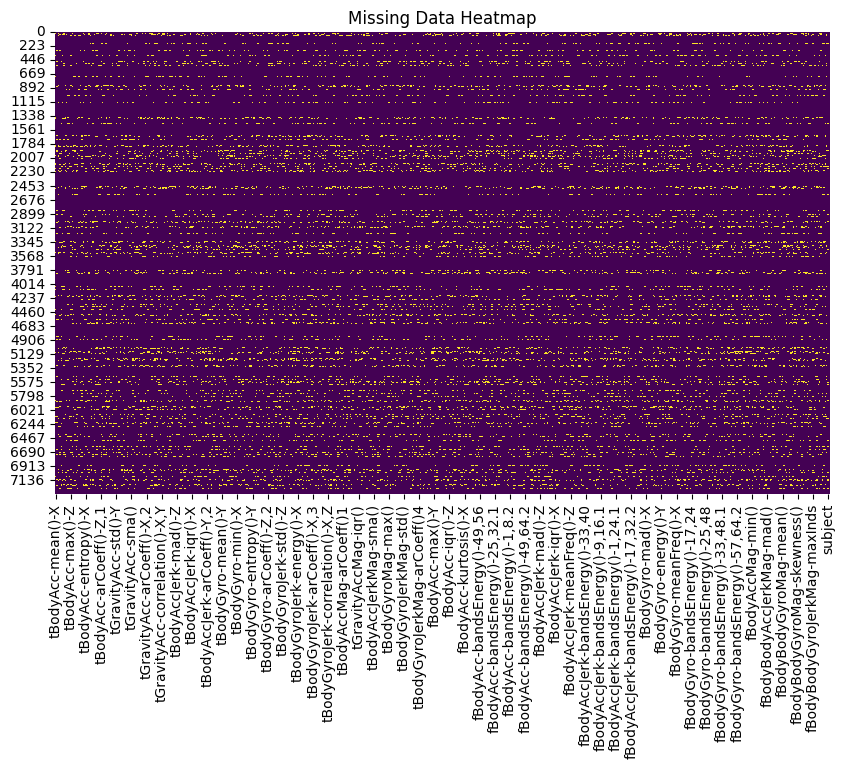

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [56]:
print(train_data.dtypes)


tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                 float64
Activity                 object
Length: 563, dtype: object


2. Adding Outliers

In [57]:
import numpy as np

# Exclude the `Activity` column from contamination
feature_columns = train_data.columns.difference(['Activity'])

# Select a subset of features (10% of total features excluding `Activity`)
num_features_to_contaminate = int(0.1 * len(feature_columns))
selected_features = np.random.choice(feature_columns, num_features_to_contaminate, replace=False)

# Define a percentage of rows to inject outliers
num_rows_to_contaminate = int(0.05 * train_data.shape[0])  # 5% of rows

# Randomly select row indices for contamination
row_indices = np.random.choice(train_data.index, num_rows_to_contaminate, replace=False)

# Add outliers by modifying values in selected features for chosen rows
for feature in selected_features:
    # Add outliers by increasing the value by 3x the standard deviation
    std_dev = train_data[feature].std()
    train_data.loc[row_indices, feature] += 3 * std_dev


3. Adding Inconsitent scales

In [58]:

from sklearn.preprocessing import MinMaxScaler

# Introduce inconsistent scales to a subset of features by applying different scaling factors
scaled_features = ['angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)']  # Example features

# Apply different arbitrary scaling factors to each selected feature
train_data[scaled_features[0]] *= 10       # Scale by a factor of 10
train_data[scaled_features[1]] *= 0.1      # Scale down by a factor of 0.1
train_data[scaled_features[2]] *= 100      # Scale up by a factor of 100

print("\nPreview of data with inconsistent scales:")
print(train_data[scaled_features].head())



Preview of data with inconsistent scales:
   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)
0             -8.412468                   NaN             -5.862692
1             -8.447876              0.018029             -5.431672
2             -8.489335              0.018064             -4.911782
3             -8.486494                   NaN             -4.766318
4             -8.478653              0.018515             -4.389225


4. Class Imbalance

In [59]:
print("Unique values in 'Activity' column before encoding:", train_data['Activity'].unique())

X_train = train_data.drop(columns=['Activity'])
y_train = train_data['Activity']
X_test = test_data.drop(columns=['Activity'])
y_test = test_data['Activity']

# Create more aggressive class imbalance
# Define classes to heavily reduce

reduce_classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING_UPSTAIRS']
for activity in reduce_classes:
    activity_indices = y_train[y_train == activity].index
    n_keep = int(0.6 * len(activity_indices))  # Keep only 60% of each class
    drop_indices = np.random.choice(activity_indices, len(activity_indices) - n_keep, replace=False)
    X_train= X_train.drop(index=drop_indices)
    y_train = y_train.drop(index=drop_indices)



Unique values in 'Activity' column before encoding: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


5. Label Noise


In [60]:
# Introduce label noise by shuffling labels for 10% of the remaining training data
# Separate features and target, keeping 'subject' as a feature
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (Activity) for model compatibility
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)



label_noise_fraction = 0.1
n_label_noise = int(label_noise_fraction * len(y_train))
label_noise_indices = np.random.choice(y_train.index, n_label_noise, replace=False)
y_train_noisy = y_train.copy()
y_train_noisy.loc[label_noise_indices] = np.random.choice(y_train.unique(), n_label_noise)

# Update encoded labels after imbalance and label noise
y_train_enc_noisy = le.fit_transform(y_train_noisy)


Trivial Model (Majority Class) Training Accuracy: 0.2253
Trivial Model (Majority Class) Test Accuracy: 0.1683
Perceptron Training Accuracy: 0.8836

Classification Report (Training - Perceptron):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       859
           1       0.92      0.78      0.85       784
           2       0.82      0.90      0.86       832
           3       0.86      0.95      0.90      1193
           4       0.91      0.90      0.90       957
           5       0.92      0.81      0.86       669

    accuracy                           0.88      5294
   macro avg       0.89      0.87      0.88      5294
weighted avg       0.89      0.88      0.88      5294

Perceptron Test Accuracy: 0.3251

Classification Report (Test - Perceptron):
               precision    recall  f1-score   support

           0       0.21      1.00      0.35       537
           1       1.00      0.08      0.14       491
           2       1

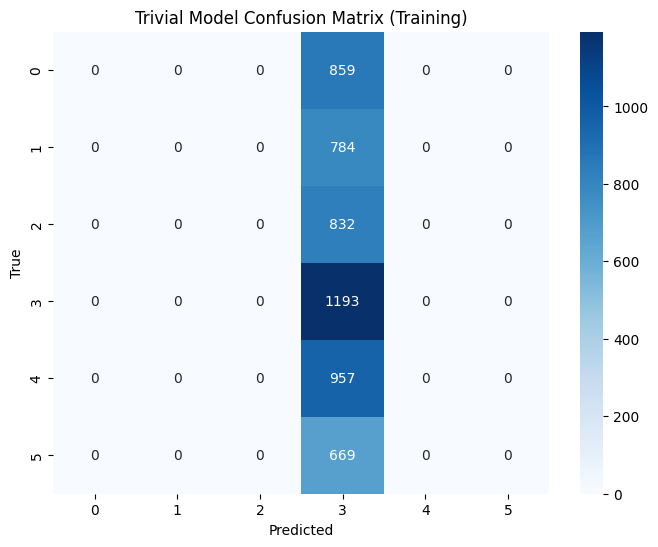

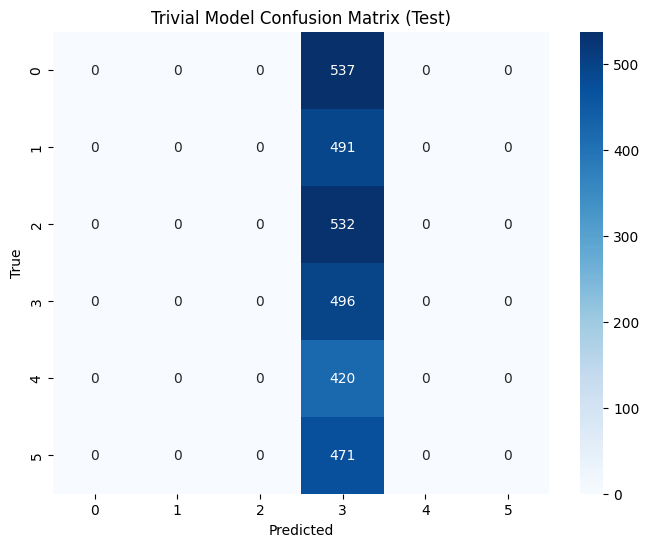

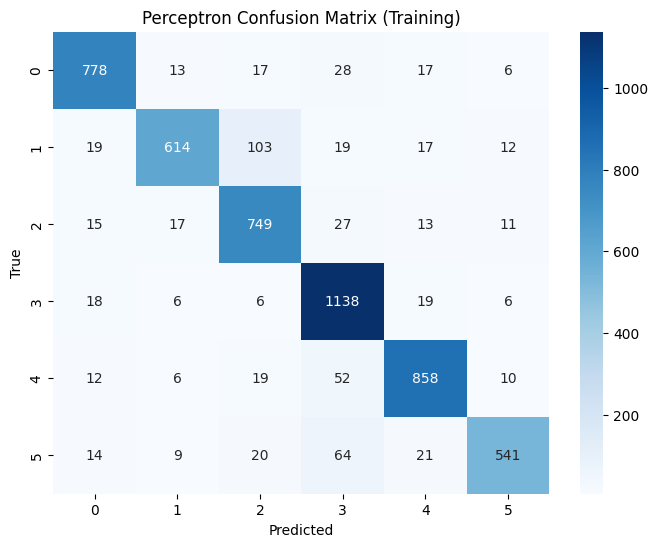

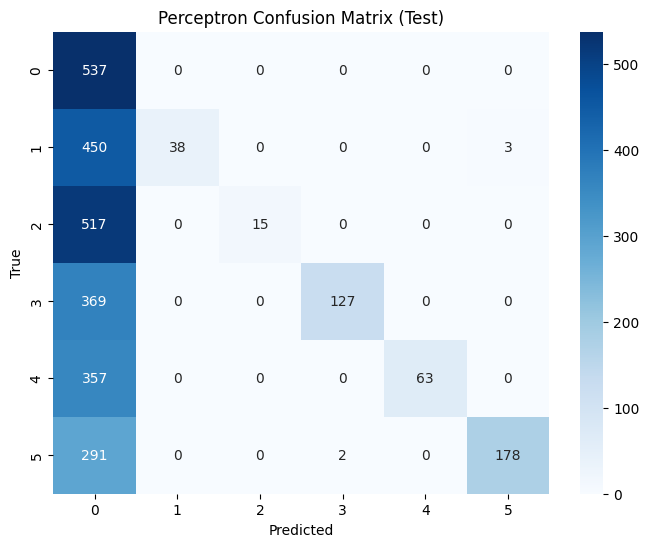

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing values in X_train using class-wise means
X_train_filled = X_train.copy()
for cls in np.unique(y_train_enc_noisy):
    class_indices = y_train_enc_noisy == cls
    class_data = X_train.loc[class_indices]
    class_means = class_data.mean()
    X_train_filled.loc[class_indices] = class_data.fillna(class_means)

# Fill missing values in X_test using class-wise means derived from training data
X_test_filled = X_test.copy()
for cls in np.unique(y_test_enc):
    class_indices = y_test_enc == cls
    class_data = X_test.loc[class_indices]
    class_means = X_train[y_train_enc_noisy == cls].mean()  # Use training data class means
    X_test_filled.loc[class_indices] = class_data.fillna(class_means)

### Step 1: Trivial Baseline
# Trivial model predicting the majority class
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train_filled, y_train_enc_noisy)

# Evaluate on training data
y_train_dummy_pred = dummy_model.predict(X_train_filled)
train_dummy_accuracy = accuracy_score(y_train_enc_noisy, y_train_dummy_pred)
print(f"Trivial Model (Majority Class) Training Accuracy: {train_dummy_accuracy:.4f}")

# Evaluate on test data
y_test_dummy_pred = dummy_model.predict(X_test_filled)
test_dummy_accuracy = accuracy_score(y_test_enc, y_test_dummy_pred)
print(f"Trivial Model (Majority Class) Test Accuracy: {test_dummy_accuracy:.4f}")

### Step 2: Non-Trivial Baseline (Perceptron)
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train_filled, y_train_enc_noisy)

# Evaluate on training data
y_train_perceptron_pred = perceptron_model.predict(X_train_filled)
train_perceptron_accuracy = accuracy_score(y_train_enc_noisy, y_train_perceptron_pred)
print(f"Perceptron Training Accuracy: {train_perceptron_accuracy:.4f}")
print("\nClassification Report (Training - Perceptron):\n", classification_report(y_train_enc_noisy, y_train_perceptron_pred))

# Evaluate on test data
y_test_perceptron_pred = perceptron_model.predict(X_test_filled)
test_perceptron_accuracy = accuracy_score(y_test_enc, y_test_perceptron_pred)
print(f"Perceptron Test Accuracy: {test_perceptron_accuracy:.4f}")
print("\nClassification Report (Test - Perceptron):\n", classification_report(y_test_enc, y_test_perceptron_pred))

### Step 3: Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrices for training and test datasets (Trivial Model)
plot_confusion_matrix(y_train_enc_noisy, y_train_dummy_pred, "Trivial Model Confusion Matrix (Training)")
plot_confusion_matrix(y_test_enc, y_test_dummy_pred, "Trivial Model Confusion Matrix (Test)")

# Plot confusion matrices for training and test datasets (Perceptron)
plot_confusion_matrix(y_train_enc_noisy, y_train_perceptron_pred, "Perceptron Confusion Matrix (Training)")
plot_confusion_matrix(y_test_enc, y_test_perceptron_pred, "Perceptron Confusion Matrix (Test)")

y_train = y_train_enc_noisy
y_test = y_test_enc

Per-Class Metrics:
Precision:

Measures how many predictions for a class were correct.
Focuses on minimizing false positives.
High precision is important when false alarms are costly.
Recall:

Measures how well the model identifies all true instances of a class.
Focuses on minimizing false negatives.
High recall is crucial when missing instances is costly (e.g., medical diagnoses).
F1-Score:

Balances precision and recall into a single score.
Useful when both false positives and false negatives matter.
Support:

Shows the number of actual instances for each class in the dataset.
Helps interpret performance on small or imbalanced classes.
Aggregated Metrics:
Accuracy:

Measures the overall percentage of correct predictions.
Can be misleading with imbalanced datasets, as it favors majority classes.
Macro Average:

Gives equal importance to all classes, regardless of their size.
Useful for evaluating fairness across classes.
Weighted Average:

Takes class sizes into account when averaging metrics.
Reflects overall performance in imbalanced datasets.

Feature engineering

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Print number of features before feature engineering
print("Number of features before feature engineering:", X_train_filled.shape[1])

# Feature Engineering
def feature_engineering(data):
    # Adding statistical features
    data['tBodyAcc_mean_mag'] = np.sqrt(data['tBodyAcc-mean()-X']**2 + data['tBodyAcc-mean()-Y']**2 + data['tBodyAcc-mean()-Z']**2)
    data['tBodyAcc_std_mag'] = np.sqrt(data['tBodyAcc-std()-X']**2 + data['tBodyAcc-std()-Y']**2 + data['tBodyAcc-std()-Z']**2)
    data['tBodyAcc_min'] = data[['tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z']].min(axis=1)
    data['tBodyAcc_max'] = data[['tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z']].max(axis=1)

    # Domain-specific features
    data['tGravityAcc_magnitude'] = np.sqrt(data['tGravityAcc-mean()-X']**2 + data['tGravityAcc-mean()-Y']**2 + data['tGravityAcc-mean()-Z']**2)
    data['tBodyAccJerk_magnitude'] = np.sqrt(data['tBodyAccJerk-mean()-X']**2 + data['tBodyAccJerk-mean()-Y']**2 + data['tBodyAccJerk-mean()-Z']**2)
    data['tBodyGyroJerk_magnitude'] = np.sqrt(data['tBodyGyroJerk-mean()-X']**2 + data['tBodyGyroJerk-mean()-Y']**2 + data['tBodyGyroJerk-mean()-Z']**2)

    # Feature interactions
    data['tBodyAcc_Gyro_mean_X_product'] = data['tBodyAcc-mean()-X'] * data['tBodyGyro-mean()-X']
    data['tBodyAcc_Gyro_mean_Y_product'] = data['tBodyAcc-mean()-Y'] * data['tBodyGyro-mean()-Y']
    data['tBodyAcc_Gyro_mean_Z_product'] = data['tBodyAcc-mean()-Z'] * data['tBodyGyro-mean()-Z']

    # Statistical moments
    data['tBodyAcc_mean_X_skew'] = data['tBodyAcc-mean()-X'].skew()
    data['tBodyAcc_mean_Y_skew'] = data['tBodyAcc-mean()-Y'].skew()
    data['tBodyAcc_mean_Z_skew'] = data['tBodyAcc-mean()-Z'].skew()
    data['tBodyAcc_mean_X_kurt'] = data['tBodyAcc-mean()-X'].kurt()
    data['tBodyAcc_mean_Y_kurt'] = data['tBodyAcc-mean()-Y'].kurt()
    data['tBodyAcc_mean_Z_kurt'] = data['tBodyAcc-mean()-Z'].kurt()

    # Signal ratios
    data['tBodyAcc_X_max_min_ratio'] = data['tBodyAcc-max()-X'] / (data['tBodyAcc-min()-X'] + 1e-5)
    data['tBodyAcc_Y_max_min_ratio'] = data['tBodyAcc-max()-Y'] / (data['tBodyAcc-min()-Y'] + 1e-5)
    data['tBodyAcc_Z_max_min_ratio'] = data['tBodyAcc-max()-Z'] / (data['tBodyAcc-min()-Z'] + 1e-5)

    # Time-domain features
    data['tBodyAcc_sma'] = data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']].mean(axis=1)
    data['tBodyGyro_sma'] = data[['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']].mean(axis=1)

# Apply feature engineering to both train and test datasets
feature_engineering(X_train_filled)
feature_engineering(X_test_filled)

# Print number of features after feature engineering
print("Number of features after feature engineering:", X_train_filled.shape[1])

# Display first few rows to verify engineered features
print("Sample of engineered features in X_train_filled:")
print(X_train_filled.head())

print("\nSample of engineered features in X_test_filled:")
print(X_test_filled.head())
X_train = X_train_filled
X_test = X_test_filled

Number of features before feature engineering: 562
Number of features after feature engineering: 583
Sample of engineered features in X_train_filled:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
2           0.279653          -0.019467          -0.113462         -0.995380   
4           0.276629          -0.016570          -0.115362         -0.998139   
5           0.277199          -0.010098          -0.105137         -0.997335   
6           0.279454          -0.019641          -0.110022         -0.996921   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
2         -0.967187         -0.978944         -0.996520         -0.963668   
4         -0.980817         -0.990482         -0.998321         -0.979672   
5         -0.990487         -0.995420         -0.997627      


Sensors Overview
In this dataset, we have data from two main types of sensors: Accelerometer and Gyroscope.

Accelerometer (Body Acceleration)

Purpose: Measures linear acceleration, which is the rate of change in velocity. It captures movement along the X, Y, and Z axes (3D space).
Application: An accelerometer helps in identifying different kinds of activities by detecting the direction and intensity of motion. For example:
When standing still, acceleration values are minimal.
When walking or running, there’s a rhythmic pattern in acceleration along the axes.
Feature Examples: Mean, Standard Deviation, Magnitude, and Max-Min Ratio across the X, Y, and Z axes give insights into the average, variability, and intensity of movements.
Gyroscope (Body Orientation and Rotation)

Purpose: Measures the angular velocity (rotation rate) around the X, Y, and Z axes.
Application: The gyroscope is useful in detecting rotations, twists, or tilts. It helps distinguish activities that involve more rotational movement, like walking upstairs, where rotation around certain axes is prominent.
Feature Examples: Magnitude and interactions with accelerometer data (e.g., products of accelerometer and gyroscope values) help identify activities that involve both linear and rotational movements.
These two sensors capture complementary aspects of motion. While the accelerometer captures linear movement intensity and direction, the gyroscope captures rotational patterns.

Explanation of the Feature Engineering Code
Let's walk through the code and its purpose step-by-step.

python
Copy code
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Print number of features before feature engineering
print("Number of features before feature engineering:", train_data.shape[1])

# Impute missing values using class-wise means
for cls in train_data['Activity'].unique():
    class_data = train_data[train_data['Activity'] == cls]
    class_means = class_data.mean()
    for feature in class_means.index:
        if feature != 'Activity':
            train_data.loc[train_data['Activity'] == cls, feature] = train_data.loc[train_data['Activity'] == cls, feature].fillna(class_means[feature])
            test_data.loc[test_data['Activity'] == cls, feature] = test_data.loc[test_data['Activity'] == cls, feature].fillna(class_means[feature])
Imputing Missing Values:
We calculate the mean for each feature within each activity class (e.g., sitting, walking) to impute missing values. This way, we use activity-specific patterns to fill in gaps rather than using overall averages, which maintains the integrity of each activity's characteristics.
python
Copy code
# Feature Engineering
def feature_engineering(data):
    # Adding statistical features
    data['tBodyAcc_mean_mag'] = np.sqrt(data['tBodyAcc-mean()-X']**2 + data['tBodyAcc-mean()-Y']**2 + data['tBodyAcc-mean()-Z']**2)
    data['tBodyAcc_std_mag'] = np.sqrt(data['tBodyAcc-std()-X']**2 + data['tBodyAcc-std()-Y']**2 + data['tBodyAcc-std()-Z']**2)
    data['tBodyAcc_min'] = data[['tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z']].min(axis=1)
    data['tBodyAcc_max'] = data[['tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z']].max(axis=1)
Statistical Features:
We calculate magnitude for both the mean and standard deviation of body acceleration. The magnitude represents the combined intensity of movement across the three axes (X, Y, and Z).
Min and Max: By finding the minimum and maximum values across the axes, we capture the range of movement, indicating how much motion varies.
python
Copy code
    # Domain-specific features
    data['tGravityAcc_magnitude'] = np.sqrt(data['tGravityAcc-mean()-X']**2 + data['tGravityAcc-mean()-Y']**2 + data['tGravityAcc-mean()-Z']**2)
    data['tBodyAccJerk_magnitude'] = np.sqrt(data['tBodyAccJerk-mean()-X']**2 + data['tBodyAccJerk-mean()-Y']**2 + data['tBodyAccJerk-mean()-Z']**2)
    data['tBodyGyroJerk_magnitude'] = np.sqrt(data['tBodyGyroJerk-mean()-X']**2 + data['tBodyGyroJerk-mean()-Y']**2 + data['tBodyGyroJerk-mean()-Z']**2)
Domain-Specific Features:
Gravity Acceleration Magnitude: We calculate the magnitude of gravity-related acceleration. Since gravity affects orientation, this feature helps identify static positions like lying down, where gravity has a larger influence.
Jerk Magnitude: Calculating jerk (rate of change of acceleration) helps identify sudden movements or shifts, such as quick turns or stops.
python
Copy code
    # Feature interactions
    data['tBodyAcc_Gyro_mean_X_product'] = data['tBodyAcc-mean()-X'] * data['tBodyGyro-mean()-X']
    data['tBodyAcc_Gyro_mean_Y_product'] = data['tBodyAcc-mean()-Y'] * data['tBodyGyro-mean()-Y']
    data['tBodyAcc_Gyro_mean_Z_product'] = data['tBodyAcc-mean()-Z'] * data['tBodyGyro-mean()-Z']
Feature Interactions:
We multiply the body acceleration and gyroscope mean values for each axis. This product captures the simultaneous effect of linear and rotational movement, which is useful for distinguishing complex activities like climbing stairs or twisting.
python
Copy code
    # Statistical moments
    data['tBodyAcc_mean_X_skew'] = data['tBodyAcc-mean()-X'].skew()
    data['tBodyAcc_mean_Y_skew'] = data['tBodyAcc-mean()-Y'].skew()
    data['tBodyAcc_mean_Z_skew'] = data['tBodyAcc-mean()-Z'].skew()
    data['tBodyAcc_mean_X_kurt'] = data['tBodyAcc-mean()-X'].kurt()
    data['tBodyAcc_mean_Y_kurt'] = data['tBodyAcc-mean()-Y'].kurt()
    data['tBodyAcc_mean_Z_kurt'] = data['tBodyAcc-mean()-Z'].kurt()
Statistical Moments (Skewness and Kurtosis):
Skewness: Measures the asymmetry of the distribution of acceleration data. High skewness might indicate that movement is predominantly in one direction.
Kurtosis: Measures the "tailedness" of the distribution, helping to identify whether there are abrupt or extreme movements.
python
Copy code
    # Signal ratios
    data['tBodyAcc_X_max_min_ratio'] = data['tBodyAcc-max()-X'] / (data['tBodyAcc-min()-X'] + 1e-5)
    data['tBodyAcc_Y_max_min_ratio'] = data['tBodyAcc-max()-Y'] / (data['tBodyAcc-min()-Y'] + 1e-5)
    data['tBodyAcc_Z_max_min_ratio'] = data['tBodyAcc-max()-Z'] / (data['tBodyAcc-min()-Z'] + 1e-5)
Signal Ratios:
These ratios provide a normalized intensity measure of the signal. A high max-min ratio indicates that there is a lot of variability, which can help differentiate high-energy activities (like running) from low-energy activities (like sitting).
python
Copy code
    # Time-domain features
    data['tBodyAcc_sma'] = data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']].mean(axis=1)
    data['tBodyGyro_sma'] = data[['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']].mean(axis=1)
Simple Moving Averages (SMA):
SMAs for body acceleration and gyroscope give an overall measure of activity over time. High SMA indicates sustained activity, while low SMA suggests inactivity.
Final Feature Engineering Steps
python
Copy code
# Apply feature engineering to both train and test datasets
feature_engineering(train_data)
feature_engineering(test_data)

# Print number of features after feature engineering
print("Number of features after feature engineering:", train_data.shape[1])
We apply the feature engineering steps to both training and testing datasets and print the total number of features before and after the feature engineering.

Summary of Feature Engineering Goals
Capture Movement Intensity and Direction (accelerometer features)
Identify Rotational and Orientation Aspects (gyroscope features)
Leverage Combinations and Ratios to detect specific patterns or types of movements.
Use Statistical Moments to understand distribution patterns in motion data (e.g., skewness

Standardization to fix inconsistent scales

In [63]:
# Normalizing the data to fix inconsistent scales
scaler = MinMaxScaler()

X_train[scaled_features] = scaler.fit_transform(X_train[scaled_features])

print("\nPreview of data after normalization:")
print(X_train[scaled_features].head())
X_train.head()



Preview of data after normalization:
   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)
0              0.079377              0.807433              0.470687
2              0.075533              0.798722              0.475441
4              0.076067              0.801776              0.478054
5              0.124128              0.807433              0.516375
6              0.073925              0.807433              0.516375


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAcc_mean_Y_skew,tBodyAcc_mean_Z_skew,tBodyAcc_mean_X_kurt,tBodyAcc_mean_Y_kurt,tBodyAcc_mean_Z_kurt,tBodyAcc_X_max_min_ratio,tBodyAcc_Y_max_min_ratio,tBodyAcc_Z_max_min_ratio,tBodyAcc_sma,tBodyGyro_sma
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,3.918722,0.763967,29.110288,199.168235,39.585583,-1.095862,-0.827257,-0.928471,0.045128,0.023420
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,3.918722,0.763967,29.110288,199.168235,39.585583,-1.112696,-0.817471,-0.975046,0.048908,-0.012636
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,3.918722,0.763967,29.110288,199.168235,39.585583,-1.109956,-0.833027,-0.984277,0.048232,-0.010425
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.825801,-0.859930,...,3.918722,0.763967,29.110288,199.168235,39.585583,-1.012749,-0.725627,-0.893723,0.053988,-0.006719
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,3.918722,0.763967,29.110288,199.168235,39.585583,-1.105677,-0.838849,-0.959632,0.049930,-0.005394



Class Distribution in Training Data:
3    1193
4     957
0     859
2     832
1     784
5     669
Name: count, dtype: int64


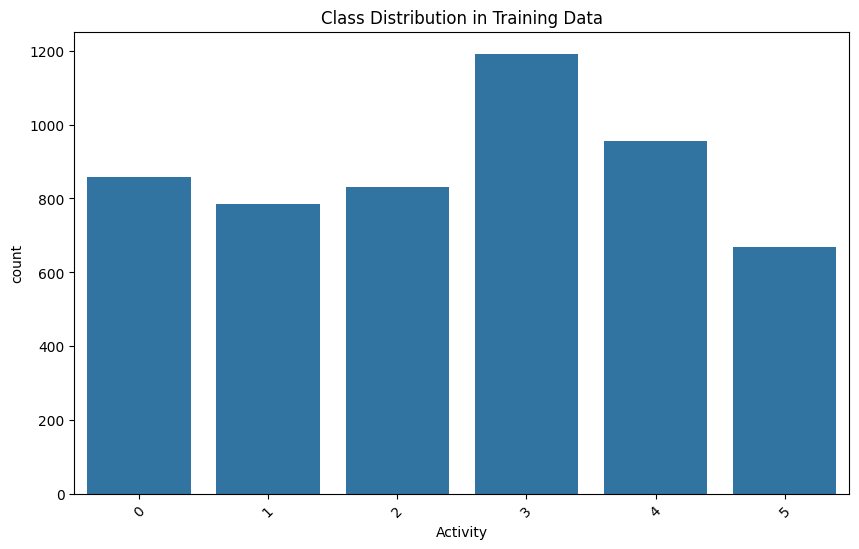

In [64]:
 
import seaborn as sns


# Convert y_train to a pandas Series if it's not already
y_train = pd.Series(y_train)

# Check class distribution in training data
print("\nClass Distribution in Training Data:")
print(y_train.value_counts())  

# Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)  # Directly plot y_train as Seaborn expects a single feature for countplot
plt.title("Class Distribution in Training Data")
plt.xlabel("Activity")
plt.xticks(rotation=45)
plt.show()


Correlation Analysis

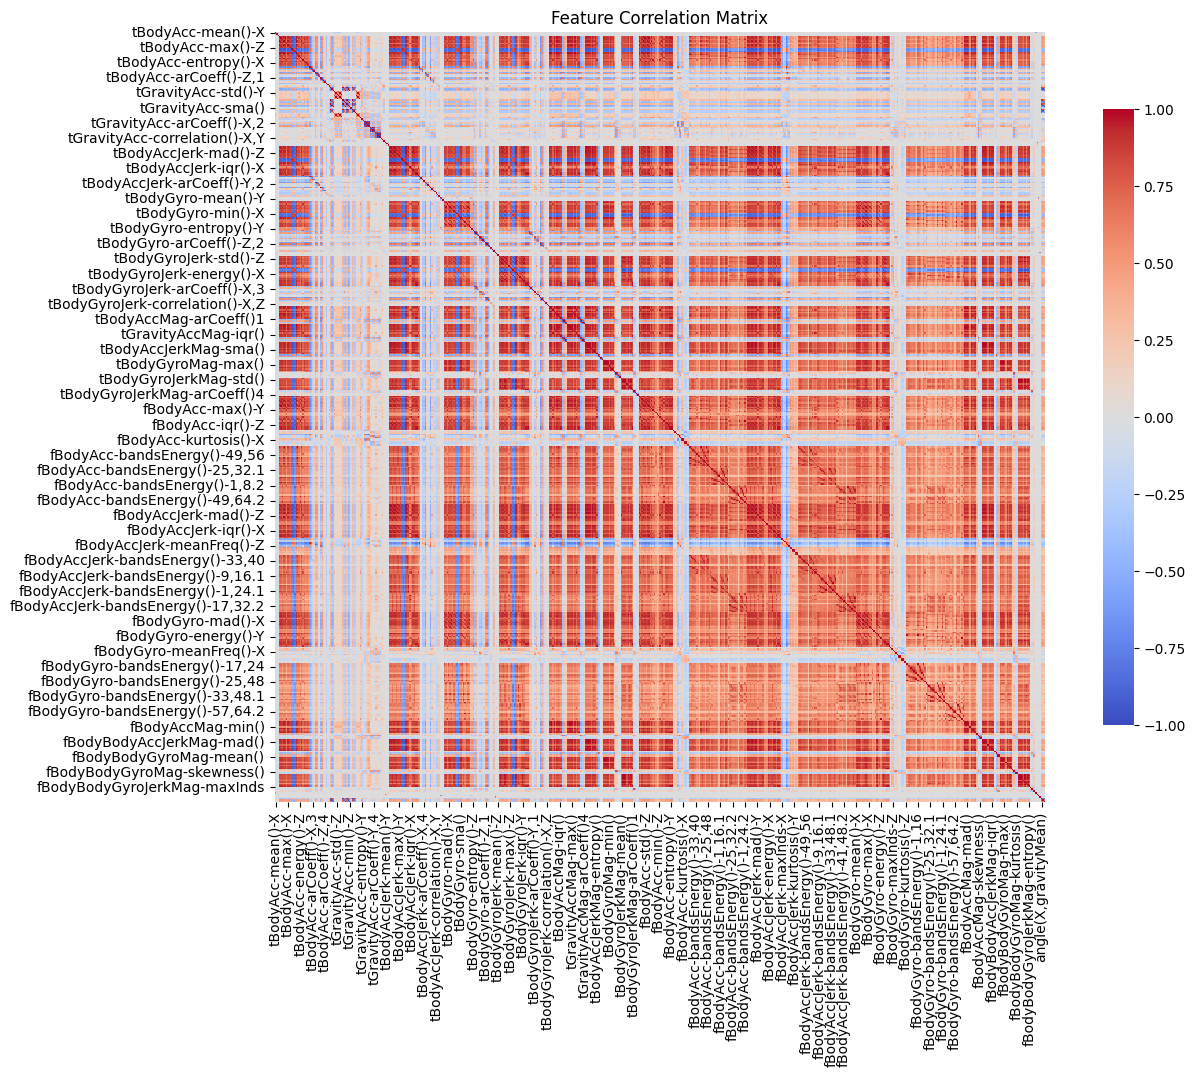

Highly correlated feature pairs:
                    Feature 1             Feature 2  Correlation
1687        tBodyAcc-std()-X      tBodyAcc-std()-Y     0.926880
1689        tBodyAcc-std()-X      tBodyAcc-mad()-X     0.998619
1690        tBodyAcc-std()-X      tBodyAcc-mad()-Y     0.920794
1692        tBodyAcc-std()-X      tBodyAcc-max()-X     0.980392
1695        tBodyAcc-std()-X      tBodyAcc-min()-X    -0.967059
...                      ...                   ...          ...
313640  angle(Y,gravityMean)  tGravityAcc-mean()-Y    -0.993476
313652  angle(Y,gravityMean)   tGravityAcc-min()-Y    -0.989953
314202  angle(Z,gravityMean)  tGravityAcc-mean()-Z    -0.995074
314211  angle(Z,gravityMean)   tGravityAcc-max()-Z    -0.992850
314214  angle(Z,gravityMean)   tGravityAcc-min()-Z    -0.990826

[13350 rows x 3 columns]


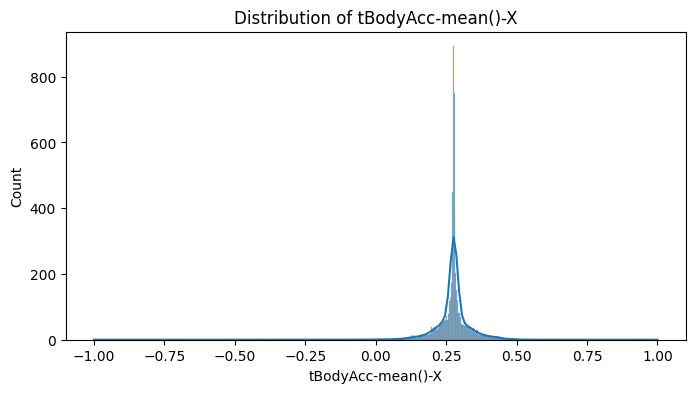

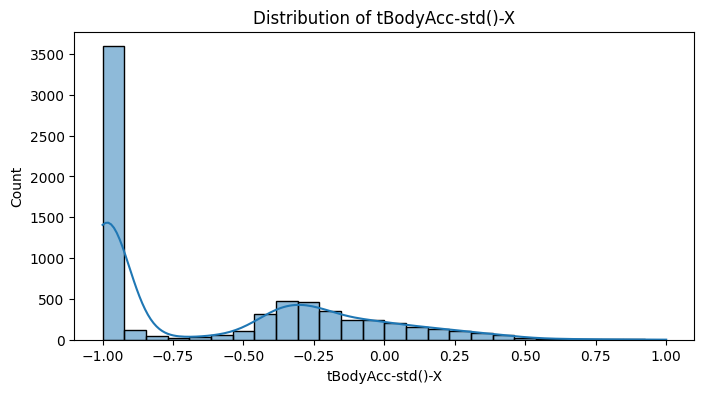

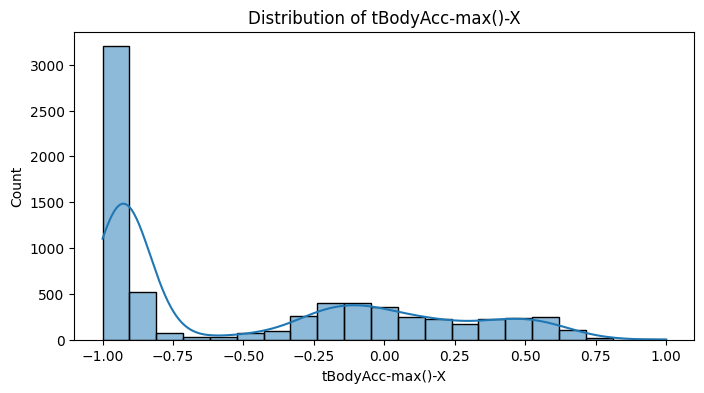

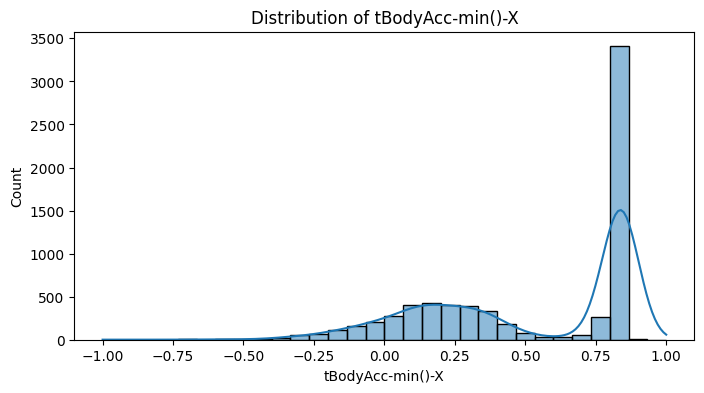

In [65]:
# Select only numeric columns (excluding 'Activity' and 'subject')
# numeric_features = train_data_filled.drop(columns=['Activity', 'subject']).select_dtypes(include=['float64', 'int64'])
numeric_features = train_data.drop(columns=['Activity', 'subject'])

# Now `numeric_features` contains all columns except "Activity" and "Subject"

# Calculate the correlation matrix for numeric features
correlation_matrix = numeric_features.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated features with correlation > 0.9
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Feature 1'] != high_corr_pairs['Feature 2']) & (high_corr_pairs['Correlation'].abs() > 0.9)]
print("Highly correlated feature pairs:\n", high_corr_pairs)

# Plot distribution of selected features to examine skewness
features_to_plot = ['tBodyAcc-mean()-X', 'tBodyAcc-std()-X', 'tBodyAcc-max()-X', 'tBodyAcc-min()-X']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


Trivial

In [66]:
from sklearn.dummy import DummyClassifier

# Trivial model that always predicts the majority class
trivial_model = DummyClassifier(strategy="most_frequent")
trivial_model.fit(X_train, y_train)
trivial_accuracy = trivial_model.score(X_test, y_test)*100
print(f"Accuracy of trivial model on full training set: {trivial_accuracy:.2f}%")


Accuracy of trivial model on full training set: 16.83%


Baseline

In [67]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Non-trivial baseline using Perceptron
non_trivial_model = Perceptron(max_iter=1000, random_state=42)
non_trivial_model.fit(X_train, y_train)

# Evaluate the non-trivial model
print("Non-Trivial Baseline Model (Perceptron) Accuracy on Training Data:", non_trivial_model.score(X_train, y_train))
print("Non-Trivial Baseline Model (Perceptron) Accuracy on Test Data:", non_trivial_model.score(X_test, y_test))

# from sklearn.linear_model import LogisticRegression



Non-Trivial Baseline Model (Perceptron) Accuracy on Training Data: 0.7210049112202493
Non-Trivial Baseline Model (Perceptron) Accuracy on Test Data: 0.8069222938581608


Outlier Detection and Removal

In [68]:
import numpy as np
import pandas as pd

# Detect outliers using Z-scores for the selected features
# We’ll flag any Z-score greater than 3 or less than -3 as an outlier

# Copy of data to avoid altering the original `train_data`
train_data_cleaned = train_data.copy()

# Calculate Z-scores for selected features
for feature in selected_features:
    # Compute the Z-score for each value in the feature column
    feature_z_scores = np.abs((train_data_cleaned[feature] - train_data_cleaned[feature].mean()) / train_data_cleaned[feature].std())

    # Identify rows with Z-score > 3 as outliers
    outlier_indices = feature_z_scores[feature_z_scores > 3].index

    # Remove these rows from the dataset
    train_data_cleaned = train_data_cleaned.drop(outlier_indices)

# Check the shape of the dataset before and after outlier removal
print("Original data shape:", train_data.shape)
print("Data shape after outlier removal:", train_data_cleaned.shape)
train_data_cleaned.head()

Original data shape: (7352, 563)
Data shape after outlier removal: (4237, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-8.447876,0.018029,-5.431672,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-8.489335,0.018064,-4.911782,1.0,STANDING
3,NaN,NaN,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,NaN,NaN,-8.486494,NaN,-4.766318,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-8.478653,0.018515,-4.389225,1.0,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,NaN,NaN,...,NaN,0.082632,-0.143439,0.275041,-0.368224,NaN,NaN,NaN,1.0,STANDING


In [69]:
# import numpy as np
# import pandas as pd

# # Assuming X_train and y_train are already defined as pandas DataFrames
# X_train_cleaned = X_train.copy()
# y_train_cleaned = y_train.copy()

# # Calculate Z-scores for all numeric features in X_train
# z_scores = np.abs((X_train_cleaned - X_train_cleaned.mean()) / X_train_cleaned.std())

# # Flag rows with any feature's Z-score > 3 as outliers
# outlier_indices = z_scores[(z_scores > 3).any(axis=1)].index

# # Remove outliers from X_train and corresponding labels from y_train
# X_train_cleaned = X_train_cleaned.drop(index=outlier_indices)
# y_train_cleaned = y_train_cleaned.drop(index=outlier_indices)

# # Output the shapes of the datasets
# print("Original X_train shape:", X_train.shape)
# print("Cleaned X_train shape:", X_train_cleaned.shape)
# print("Original y_train shape:", y_train.shape)
# print("Cleaned y_train shape:", y_train_cleaned.shape)


Normalization

In [70]:
# # Normalizing the data to fix inconsistent scales
# scaler = MinMaxScaler()
# train_data_cleaned[scaled_features] = scaler.fit_transform(train_data_cleaned[scaled_features])

# print("\nPreview of data after normalization:")
# print(train_data_cleaned[scaled_features].head())
# train_data_cleaned.head()



Class Distribution in Training Data:
3    1193
4     957
0     859
2     832
1     784
5     669
Name: count, dtype: int64


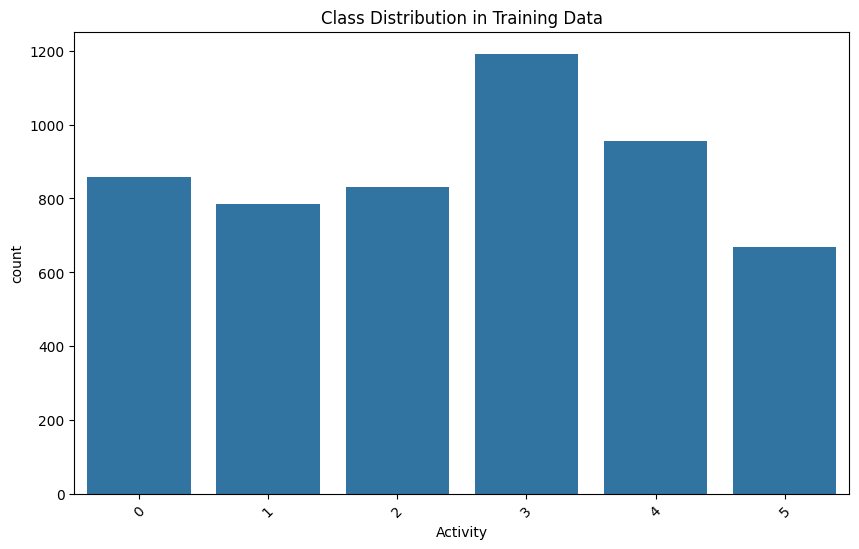

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution in training data
print("\nClass Distribution in Training Data:")
print(y_train.value_counts())  # If y_train is a Series, this works

# Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)  # Directly plot y_train as Seaborn expects a single feature for countplot
plt.title("Class Distribution in Training Data")
plt.xlabel("Activity")
plt.xticks(rotation=45)
plt.show()


SMOTE for handling data imbalance

In [72]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# # First, split your dataset into training and validation if you haven’t done so already
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Initialize SMOTE with a specific random state for reproducibility
# smote = SMOTE(random_state=42)

# # Fit and resample the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# print("Original dataset shape:", X_train.shape)
# print("Resampled dataset shape:", X_train_resampled.shape)

# # Check class distribution in training data
# print("\nClass Distribution in Training Data:")
# print(y_train_resampled.value_counts())  # If y_train is a Series, this works

# # Visualizing class distribution
# plt.figure(figsize=(10, 6))
# sns.countplot(x=y_train_resampled)  # Directly plot y_train as Seaborn expects a single feature for countplot
# plt.title("Class Distribution in Training Data")
# plt.xlabel("Activity")
# plt.xticks(rotation=45)
# plt.show()


In [73]:
X_train.shape

(5294, 583)

PCA

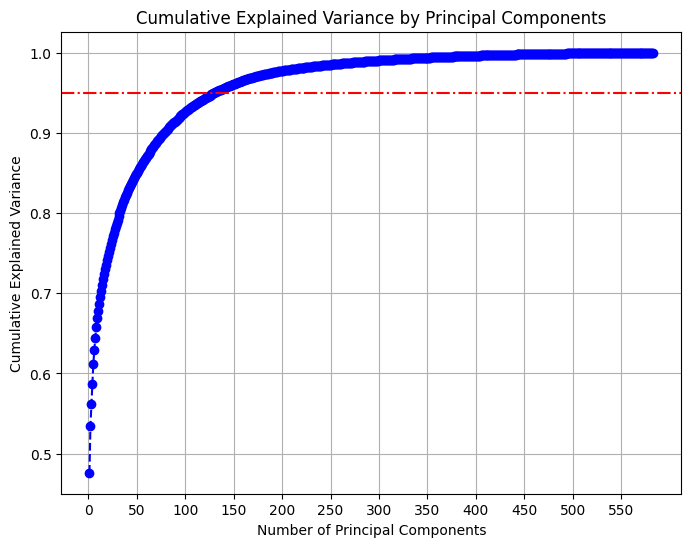

Number of components required to explain 99% of variance: 297


In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot explained variance and cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-.')  # Highlight the 97% line
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, len(explained_variance), step=50))
plt.grid()
plt.show()

# Find the number of components that explain at least 95% of the variance
components_needed = np.argmax(cumulative_explained_variance >= 0.99) + 1
print(f"Number of components required to explain 99% of variance: {components_needed}")


In [75]:
# Apply PCA with the selected number of components (293)
pca = PCA(n_components=293)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)


Logistic Regression

In [76]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression model
logistic_baseline_model = LogisticRegression(
    max_iter=1000, 
    solver='lbfgs',  # Default solver; consider 'saga' or 'liblinear' for large or sparse datasets
    random_state=42
)
logistic_baseline_model.fit(X_train_scaled, y_train)

# Evaluate on training and test data
train_accuracy = logistic_baseline_model.score(X_train_scaled, y_train)
test_accuracy = logistic_baseline_model.score(X_test_scaled, y_test)

# Display results
print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Test Accuracy:", test_accuracy)

# Detailed classification report
y_pred = logistic_baseline_model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Training Accuracy: 0.9312429165092557
Logistic Regression Test Accuracy: 0.7309127926705123

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       537
           1       0.48      0.96      0.64       491
           2       0.81      0.78      0.79       532
           3       0.77      0.81      0.79       496
           4       0.83      0.63      0.72       420
           5       0.95      0.44      0.60       471

    accuracy                           0.73      2947
   macro avg       0.80      0.73      0.73      2947
weighted avg       0.81      0.73      0.74      2947



In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for grid search
parameters = {
    'C': [0.01, 0.1, 1, 10, 20, 30],  # Regularization strengths
    'penalty': ['l2', 'l1'],  # Regularization types
    'solver': ['liblinear']  # Compatible solver for 'l1' penalty
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# GridSearchCV setup
log_reg_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=parameters,
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Display progress logs
    n_jobs=-1  # Utilize all available cores
)

# Perform grid search
log_reg_grid.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = log_reg_grid.best_estimator_.predict(X_test_scaled)

# Results
print("Best Hyperparameters:", log_reg_grid.best_params_)
print("Best Cross-Validation Accuracy:", log_reg_grid.best_score_)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.855305886912524

Test Accuracy: 0.8914149983033594

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.74      0.96      0.84       491
           2       0.94      0.81      0.87       532
           3       0.84      0.99      0.91       496
           4       0.91      0.95      0.93       420
           5       0.99      0.66      0.79       471

    accuracy                           0.89      2947
   macro avg       0.91      0.89      0.89      2947
weighted avg       0.91      0.89      0.89      2947



In [78]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier (CART)
model = DecisionTreeClassifier(criterion='gini', max_depth=10)

# Fit the model on your training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check the accuracy
test_accuracy = model.score(X_test, y_test)
train_accuracy = model.score(X_train, y_train)

# Calculate errors
test_error = 1 - test_accuracy
train_error = 1 - train_accuracy

# Print the errors
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")


Train Error: 0.07
Test Error: 0.27


In [79]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.71


Random Forest (Uses Bagging) (Parallel)

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Check accuracy for test and training sets
accuracy_test = rf_model.score(X_test, y_test)
accuracy_train = rf_model.score(X_train, y_train)

# Calculate errors
error_test = 1 - accuracy_test
error_train = 1 - accuracy_train

# Print results
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Training Accuracy: {accuracy_train:.2f}")
#print(f"Test Error: {error_test:.2f}")
#print(f"Training Error: {error_train:.2f}")


Test Accuracy: 0.79
Training Accuracy: 0.81


Adaboost (Boosting) (sequential)

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost with a default decision tree as the base estimator
ada_model = AdaBoostClassifier(n_estimators=50)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions on both training and test sets
y_pred_train = ada_model.predict(X_train)
y_pred_test = ada_model.predict(X_test)

# Calculate accuracy for training and test sets
accuracy_train = ada_model.score(X_train, y_train)
accuracy_test = ada_model.score(X_test, y_test)

# Calculate errors
error_train = 1 - accuracy_train
error_test = 1 - accuracy_test

# Print results
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Training Accuracy: {accuracy_train:.2f}")
#print(f"Test Error: {error_test:.2f}")
#print(f"Training Error: {error_train:.2f}")


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.76
Training Accuracy: 0.74


Random Forest is generally more robust and less sensitive to noise in the data because it averages over many trees. It is better at handling complex and high-dimensional data.
AdaBoost is more sensitive to noisy data or outliers because it places more weight on the misclassified examples with each iteration. This can lead to overfitting if there are many misclassified instances, especially if the model has many estimators.

In [82]:
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)


Training errors (1 - accuracy) at each step:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Validation errors (1 - accuracy) at each step:
[0.29807251 0.28371828 0.25122463 0.24008168 0.22874881 0.22987749
 0.21930166 0.20872511 0.20683742 0.2066466 ]


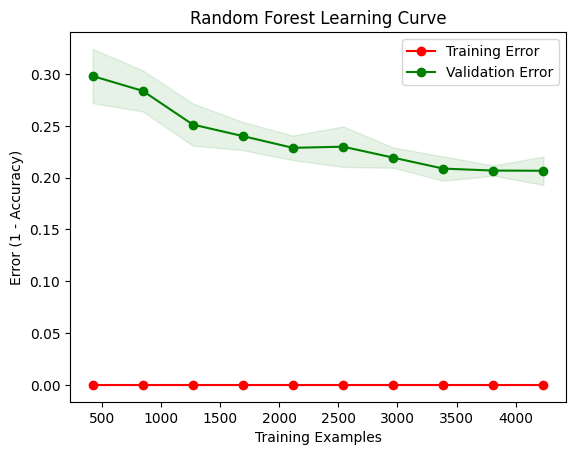

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

Training errors (1 - accuracy) at each step:
[0.46099291 0.27012987 0.31574803 0.28559622 0.30070855 0.28996458
 0.27395412 0.27591499 0.27504592 0.26205431]

Validation errors (1 - accuracy) at each step:
[0.48922228 0.42198065 0.41687864 0.38552688 0.36795957 0.36890993
 0.34415443 0.33547181 0.33131802 0.32092587]


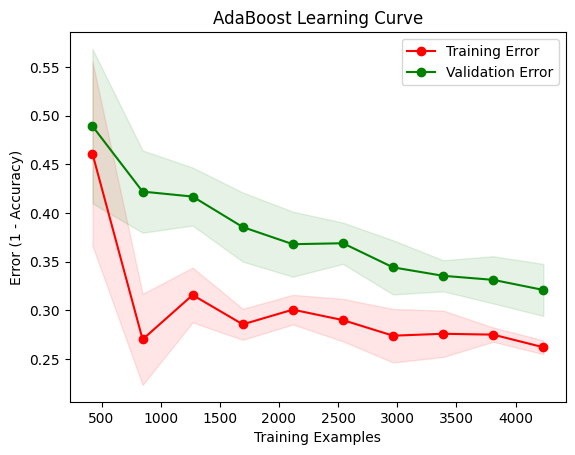

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  # For AdaBoost example
from sklearn.ensemble import AdaBoostClassifier


# Choose the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)

# Function to plot learning curve
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and std for both training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Print training and validation errors at each step
    print("Training errors (1 - accuracy) at each step:")
    print(1 - train_scores_mean)
    print("\nValidation errors (1 - accuracy) at each step:")
    print(1 - val_scores_mean)

    # Plotting
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Error (1 - Accuracy)")

    plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r", label="Training Error")
    plt.plot(train_sizes, 1 - val_scores_mean, 'o-', color="g", label="Validation Error")

    # Fill in areas for standard deviation
    plt.fill_between(train_sizes, 1 - (train_scores_mean - train_scores_std), 1 - (train_scores_mean + train_scores_std), color="r", alpha=0.1)
    plt.fill_between(train_sizes, 1 - (val_scores_mean - val_scores_std), 1 - (val_scores_mean + val_scores_std), color="g", alpha=0.1)

    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Random Forest
plot_learning_curve(model_rf, X_train, y_train, title="Random Forest Learning Curve")

# Plot learning curve for AdaBoost
plot_learning_curve(model_ada, X_train, y_train, title="AdaBoost Learning Curve")


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Set the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3]  # Updated to match the new 'estimator' keyword
}

# Base estimator
base_tree = DecisionTreeClassifier()

# Initialize AdaBoost
ada_model = AdaBoostClassifier(estimator=base_tree)  # Use 'estimator' instead of 'base_estimator'

# Perform grid search
grid_search = GridSearchCV(ada_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_ada_model = grid_search.best_estimator_

# Evaluate the tuned model
accuracy_test = best_ada_model.score(X_test, y_test)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy After Tuning: {accuracy_test:.2f}")


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
Test Accuracy After Tuning: 0.83


RF: To better understand the model's performance and reduce overfitting:

1. Limit the depth of each tree in the Random Forest (e.g., max_depth=5)
2. Reduce the Number of Estimators: While more trees improve accuracy, they also increase the likelihood of overfitting.

3. Increase the Minimum Samples per Leaf: This can prevent the model from learning overly specific details that only fit the training data.

4. Cross-validation: Perform cross-validation to assess the performance across different subsets of the dataset. This will give you a better understanding of how well the model generalizes.


Training errors (1 - accuracy) at each step:
[0.04397163 0.06942149 0.10488189 0.12455726 0.14331601 0.15434868
 0.17145749 0.17432113 0.18100236 0.18054309]

Validation errors (1 - accuracy) at each step:
[0.34075875 0.30713695 0.28862393 0.2763498  0.28144824 0.26784729
 0.27011215 0.25726878 0.2557581  0.2500897 ]


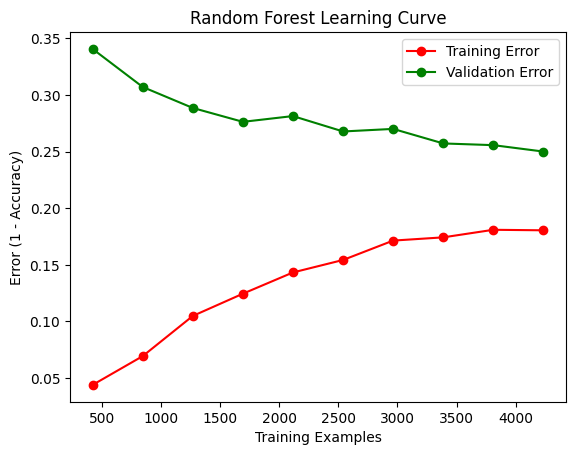

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize Random Forest classifier with limited depth and more regularization
model_rf = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=4, random_state=42)

# Function to plot learning curve
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and std for both training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Print training and validation errors at each step
    print("Training errors (1 - accuracy) at each step:")
    print(1 - train_scores_mean)
    print("\nValidation errors (1 - accuracy) at each step:")
    print(1 - val_scores_mean)

    # Plotting
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Error (1 - Accuracy)")
    plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r", label="Training Error")
    plt.plot(train_sizes, 1 - val_scores_mean, 'o-', color="g", label="Validation Error")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Random Forest
plot_learning_curve(model_rf, X_train, y_train, title="Random Forest Learning Curve")


Adaboost:

The results we're seeing indicate that the training and validation errors remain constant across the different values of n_estimators. This suggests that the model may not be benefiting from increasing the number of estimators (trees). A few things to check or try:

Model Overfitting: Since you are using a weak learner (a decision tree with max_depth=1), it might be too simple for the dataset. Even with more estimators, it may not improve significantly.

Learning Rate: AdaBoost relies on the learning rate to adjust the contribution of each base estimator. You may want to experiment with adjusting the learning_rate parameter.

Base Estimator: You might also try using a stronger base estimator (e.g., increasing the depth of the decision tree) to see if it improves performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_values = [10, 50, 100, 200]
for n in n_estimators_values:
    # Experiment with a stronger decision tree and learning rate
    model_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                   n_estimators=n, learning_rate=0.1, algorithm='SAMME')
    model_ada.fit(X_train, y_train)

    # Calculate training and validation errors
    train_error = 1 - model_ada.score(X_train, y_train)
    val_error = 1 - model_ada.score(X_test, y_test)

    # Print the errors
    print(f"n_estimators={n} - Train Error: {train_error:.4f}, Validation Error: {val_error:.4f}")



The results show how increasing the number of estimators affects training and validation errors:

1. **n_estimators=10**:
   - **Train Error**: 0.0295
   - **Validation Error**: 0.1171
   - At 10 estimators, the model fits the training data fairly well but has a higher validation error, suggesting room for improvement with additional estimators.

2. **n_estimators=50**:
   - **Train Error**: 0.0000
   - **Validation Error**: 0.0750
   - Increasing to 50 estimators leads to perfect training accuracy and a significantly reduced validation error, indicating a better generalization to unseen data.

3. **n_estimators=100**:
   - **Train Error**: 0.0000
   - **Validation Error**: 0.0648
   - With 100 estimators, validation error slightly improves further, which suggests a balanced model performance.

4. **n_estimators=200**:
   - **Train Error**: 0.0000
   - **Validation Error**: 0.0652
   - Validation error plateaus and slightly increases, indicating that adding more estimators provides minimal benefit and could lead to slight overfitting.

### Conclusion:
**n_estimators=100** appears optimal, as it minimizes validation error without overfitting the model.

SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assume X_train, y_train, X_test, y_test are your dataframes
# Set the seed for reproducibility
np.random.seed(42)

# Split some portion of the training data to be used as unlabeled (for this example, 30% of data is unlabeled)
n_labeled = int(0.7 * len(X_train))  # 70% of data is labeled, 30% is unlabeled
labeled_X = X_train[:n_labeled]
labeled_y = y_train[:n_labeled]
unlabeled_X = X_train[n_labeled:]

# Initialize the SVM model (using a linear kernel for simplicity)
svm_model = svm.SVC(kernel='linear', probability=True)

# Train the SVM on the labeled data
svm_model.fit(labeled_X, labeled_y)

# Now, let's generate pseudo-labels for the unlabeled data based on the current model's predictions
pseudo_labels = svm_model.predict(unlabeled_X)

# Combine the labeled data with pseudo-labeled data for retraining the model
X_combined = np.vstack([labeled_X, unlabeled_X])
y_combined = np.hstack([labeled_y, pseudo_labels])

# Retrain the SVM with both the labeled and pseudo-labeled data
svm_model.fit(X_combined, y_combined)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model using accuracy and classification report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))


Accuracy on Test Data: 0.7397353240583644

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       537
           1       0.53      0.92      0.67       491
           2       0.81      0.54      0.65       532
           3       0.75      0.81      0.78       496
           4       0.78      0.71      0.74       420
           5       0.89      0.51      0.65       471

    accuracy                           0.74      2947
   macro avg       0.78      0.74      0.74      2947
weighted avg       0.78      0.74      0.74      2947



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Hyperparameter tuning for SVM using GridSearchCV
print("\nHyperparameter Tuning for SVM:")

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search
gridsearch = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, verbose=2)
gridsearch.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters found by GridSearchCV:")
print(gridsearch.best_params_)
print(f"Best cross-validation accuracy: {gridsearch.best_score_:.4f}")

# Evaluate the best model on the training and testing data
print("\nSVM model report on training and testing data:")
training_report = classification_report(y_train, gridsearch.predict(X_train), output_dict=False)
testing_report = classification_report(y_test, gridsearch.predict(X_test), output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)



Hyperparameter Tuning for SVM:
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.7s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   5.1s
[CV] END ......